This is a script as part of the capstone project

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Introduction

This project will work to determine the likely severity of a car accident. The project will work using modelling of previous data to analyse the risk factors which lead to variable severity of accidents. This will include natural factors such as weather conditions, allowing the driver/ artificial intelligence controlling the vehicle to prepare for the changing conditions.

## Data

The data used in this project relies on previous statistics recorded by Seattle City, which records the variables within historic accidents, the vehicle or vehicles involved and the conditions during the incident.

In [2]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("No. of (rows, columns) = ", df.shape )
pd.set_option('display.max_columns', None)
df.head(15)

No. of (rows, columns) =  (194673, 38)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,24TH AVE NW AND NW 85TH ST,,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,DENNY WAY AND WESTLAKE AVE,NaN,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,2008/12/09 00:00:00+00,12/9/2008,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,BROADWAY AND E PIKE ST,,NaN,2,Injury Collision,Cycles,3,0,1,1,2020/04/15 00:00:00+00,4/15/2020 5:47:00 PM,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,PINE ST BETWEEN 5TH AVE AND 6TH AVE,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,2006/06/15 00:00:00+00,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,41ST AVE SW AND SW THISTLE ST,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2006/03/20 00:00:00+00,3/20/2006 3:49:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK M

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

Going back to our problem definition, not all 37 attributes are of our interest. We are only interested in exploring the impact of certain mitigable attributes on severity of the accident. So, based on the primary theoretical understanding, we select 'SEVERITYCODE' as the dependent variable and following variables as dependent variable:
'ADDRTYPE': A catagorical variable representing the type of location where incident took place. It may take the values of 'Intersection', 'Block' etc.
'COLLISIONTYPE': A categorical variable indicating the type of collision such as head-on, angle etc.
'PERSONCOUNT': An integer representing number of persons involved in the collision.
'PEDCOUNT': An integer representing number of pedestrians involved in the collision.
'PEDCYLCOUNT': An integer representing the number of bicycles involved in the collision.
'VEHCOUNT': An integer representing the number of vehicles involved in the collision.
'WEATHER': A categorical variable describing whether the weather was cloudy or rainy etc. at the time of collision
'ROADCOND': A categorical variable describing condition of the road i.e. dry or wet
'LIGHTCOND': A categorical variable describing the lighting condition at the time of collision.
So, let's extract the one target and 9 predictor variables from the dataframe and store it in a new dataframe.

In [5]:
df1 = df[["SEVERITYCODE", "ADDRTYPE", "COLLISIONTYPE", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT","WEATHER", "ROADCOND", "LIGHTCOND"]]
df1.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Angles,2,0,0,2,Overcast,Wet,Daylight
1,1,Block,Sideswipe,2,0,0,2,Raining,Wet,Dark - Street Lights On
2,1,Block,Parked Car,4,0,0,3,Overcast,Dry,Daylight
3,1,Block,Other,3,0,0,3,Clear,Dry,Daylight
4,2,Intersection,Angles,2,0,0,2,Raining,Wet,Daylight


Drop rows with missing values

In [6]:
df2 = df1.dropna(axis=0)
df2.shape

(187504, 10)

##Environmental Factors

plt.figure(figsize=(8,5))
plt.bar(df2['WEATHER'],df2['SEVERITYCODE'],align='center', alpha=0.5)
plt.title("Weather conditions", fontsize=20)
plt.xlabel("")
plt.show()

In [11]:
df2['SEVERITYCODE'].max()

2

In [19]:
df3=df2.loc[df['SEVERITYCODE'] == 2]
df3

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Angles,2,0,0,2,Overcast,Wet,Daylight
4,2,Intersection,Angles,2,0,0,2,Raining,Wet,Daylight
7,2,Intersection,Cycles,3,0,1,1,Clear,Dry,Daylight
9,2,Intersection,Angles,2,0,0,2,Clear,Dry,Daylight
14,2,Block,Head On,2,0,0,2,Clear,Dry,Dark - Street Lights On
16,2,Intersection,Left Turn,3,0,0,2,Overcast,Dry,Daylight
18,2,Block,Rear Ended,4,0,0,3,Clear,Dry,Daylight
20,2,Block,Rear Ended,3,0,0,2,Clear,Dry,Dark - Street Lights On
21,2,Intersection,Angles,5,0,0,3,Clear,Dry,Daylight
24,2,Intersection,Rear Ended,3,0,0,2,Clear,Dry,Daylight


In [13]:
df4=df2.loc[df['SEVERITYCODE'] == 1]
df4

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
1,1,Block,Sideswipe,2,0,0,2,Raining,Wet,Dark - Street Lights On
2,1,Block,Parked Car,4,0,0,3,Overcast,Dry,Daylight
3,1,Block,Other,3,0,0,3,Clear,Dry,Daylight
5,1,Intersection,Angles,2,0,0,2,Clear,Dry,Daylight
6,1,Intersection,Angles,2,0,0,2,Raining,Wet,Daylight
8,1,Block,Parked Car,2,0,0,2,Clear,Dry,Daylight
10,1,Alley,Other,2,0,0,2,Overcast,Dry,Daylight
11,1,Intersection,Angles,2,0,0,2,Clear,Dry,Daylight
12,1,Block,Rear Ended,0,0,0,2,Raining,Wet,Dark - Street Lights On
13,1,Block,Parked Car,2,0,0,2,Raining,Wet,Dark - No Street Lights


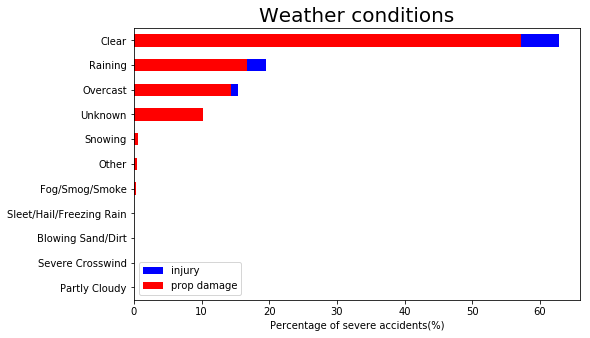

In [20]:
plt.figure(figsize=(8,5))
ax0 = df3['WEATHER'].value_counts(ascending=True, normalize=True).mul(100).plot.barh(color='blue', label='injury')
ax1 = df4['WEATHER'].value_counts( ascending=True, normalize=True).mul(100).plot.barh(color='red', label='prop damage')
plt.title("Weather conditions", fontsize=20)
plt.xlabel("Percentage of severe accidents(%)")
plt.legend()

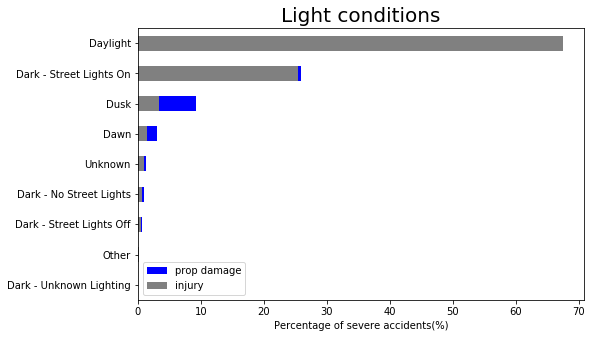

In [21]:
plt.figure(figsize=(8,5))
ax1 = df4['LIGHTCOND'].value_counts( ascending=True, normalize=True).mul(100).plot.barh(color='blue',label='prop damage')
ax1 = df3['LIGHTCOND'].value_counts( ascending=True, normalize=True).mul(100).plot.barh(color='grey',label='injury')
plt.title("Light conditions", fontsize=20)
plt.xlabel("Percentage of severe accidents(%)")
plt.legend()

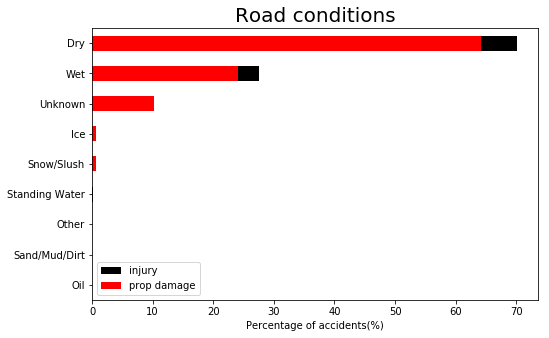

In [22]:
plt.figure(figsize=(8,5))
ax2 = df3['ROADCOND'].value_counts( ascending=True, normalize=True).mul(100).plot.barh(color='black',label='injury')
ax2 = df4['ROADCOND'].value_counts( ascending=True, normalize=True).mul(100).plot.barh(color='red',label='prop damage')
plt.title("Road conditions", fontsize=20)
plt.xlabel("Percentage of accidents(%)")
plt.legend()

Based on statistical visualisation above, the most likely conditions to have an accident is during dry light conditions with good visibility. The most severe accidents also occured in these conditions, with a greater or equal value for the optimum conditions when compared to the prop -damage data set.